<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
import ssl

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [66]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

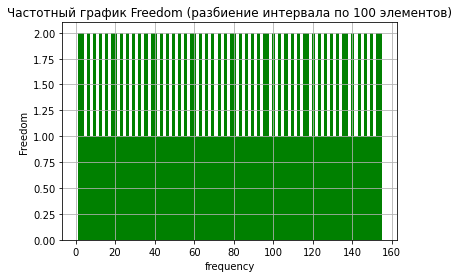

In [20]:
n, bins, patches = plt.hist(df['Freedom'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

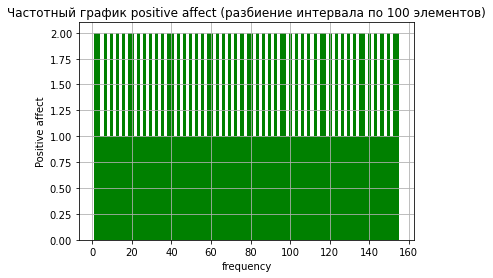

In [25]:
n, bins, patches = plt.hist(df['Positive affect'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('Positive affect')
plt.title('Частотный график positive affect (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Параметры Freedom и Positive affect имеют многовершинное распределение

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Найдем и уберем из выборки строку со значением NULL в столбце Freedom, так как значения стандартного отклонения и дисперсии 
не корректны при NULL

In [31]:
df[df['Freedom'].isnull()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


In [32]:
dfi = df.loc[df['Ladder']!=29, :]

In [40]:
print('Медиана: ', statistics.median(dfi['Freedom']))
print('Значение моды: ', statistics.mode(dfi['Freedom']))
print('Математическое ожидание: ', statistics.mean(dfi['Freedom']))
print('Стандартное отклонение: ', statistics.pstdev(dfi['Freedom']))
print('Значение дисперсии: ', statistics.pvariance(dfi['Freedom']))
print('Минимум: ', min(dfi['Freedom']))
print('Максимум: ', max(dfi['Freedom']))
print('Выбросов: ', df['Freedom'].isnull().sum())
duration_range = max(dfi['Freedom']) - min(dfi['Freedom'])
print('Размах:', duration_range)

Медиана:  78.0
Значение моды:  5.0
Математическое ожидание:  78.0
Стандартное отклонение:  44.74371464239419
Значение дисперсии:  2002.0
Минимум:  1.0
Максимум:  155.0
Выбросов:  1
Размах: 154.0


Почему нельзя найти моду?

Мода находится, но она не корректна из за большого количества значений с равным числом повторений

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

Коэффициент корреляции Пирсона: 0.6817698430601657


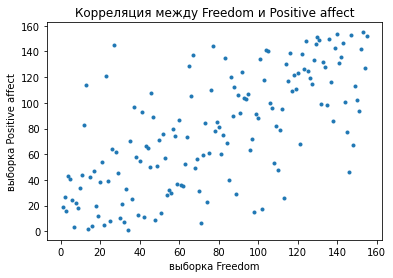

In [47]:
from scipy.stats import pearsonr
x = dfi['Freedom']
y = dfi['Positive affect']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
plt.xlabel('выборка Freedom')
plt.ylabel('выборка Positive affect')
plt.title('Корреляция между Freedom и Positive affect')
print('Коэффициент корреляции Пирсона:', corr)

Знак коэффициента показывает, что корреляция прямая, следовательно при увеличении показателя Freedom, будет увеличиваться
показатель Positive affect

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [51]:
freedom = dfi['Freedom']
print(statistics.mean(freedom))

78.0


In [52]:
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1))

0.0


In [53]:
min(freedom_1)

-77.0

In [54]:
max(freedom_1)

77.0

In [55]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

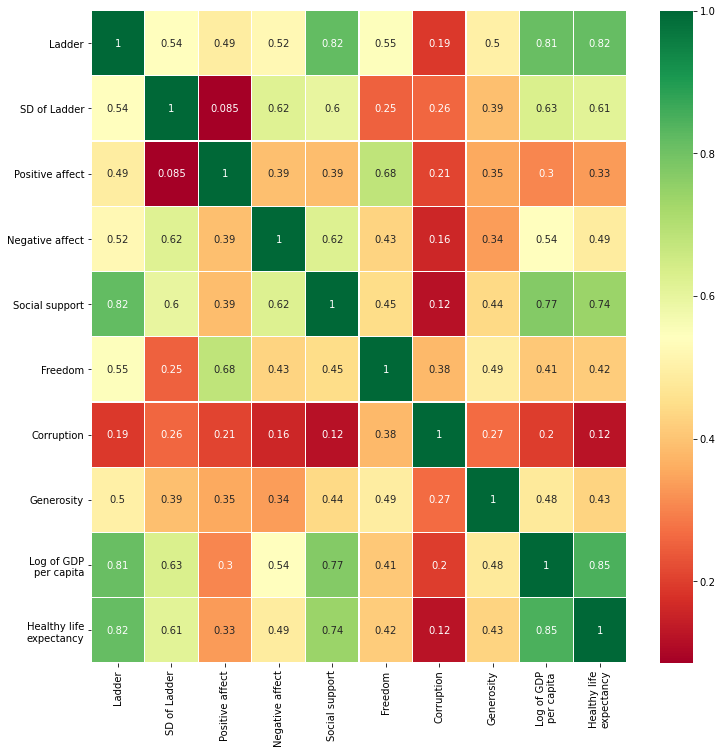

In [56]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [60]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Сделать частотный график колонки AveragePrice. Какое это распределение?

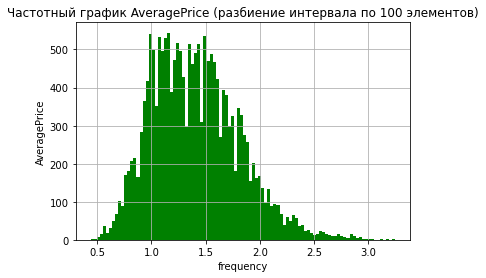

In [61]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='g')

plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 100 элементов)')
plt.grid(True)
plt.show()

Частотный график колонки AveragePrice имеет многовершинное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

Коэффициент корреляции Пирсона: -0.2083170484878848


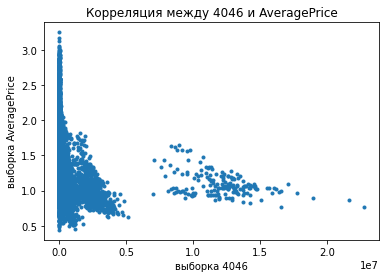

In [63]:
from scipy.stats import pearsonr
x = df['4046']
y = df['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
plt.xlabel('выборка 4046')
plt.ylabel('выборка AveragePrice')
plt.title('Корреляция между 4046 и AveragePrice')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.17292777250933541


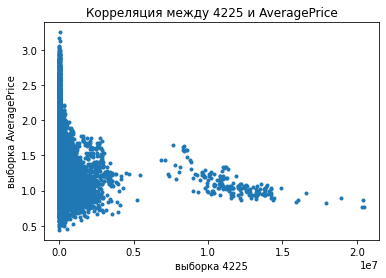

In [64]:
from scipy.stats import pearsonr
x = df['4225']
y = df['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
plt.xlabel('выборка 4225')
plt.ylabel('выборка AveragePrice')
plt.title('Корреляция между 4225 и AveragePrice')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: -0.1794459839797562


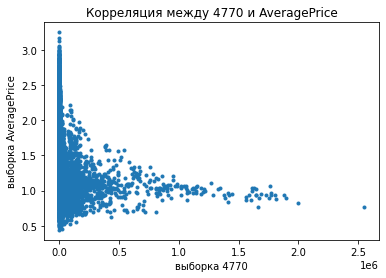

In [65]:
from scipy.stats import pearsonr
x = df['4770']
y = df['AveragePrice']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
plt.xlabel('выборка 4770')
plt.ylabel('выборка AveragePrice')
plt.title('Корреляция между 4770 и AveragePrice')
print('Коэффициент корреляции Пирсона:', corr)

Все корреляции обратные. Можно сделать вывод что при увеличениие значений в колонках 4046, 4225, 4770 значения колонки
AveragePrice будет уменьшатся